In [2]:
import tensorflow_datasets as tfds

# Download the plain text default config
imdb_plaintext, info_plaintext = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

# Download the subword encoded pretokenized dataset
imdb_subwords, info_subwords = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDA6D15/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDA6D15/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteDA6D15/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1Z0V7C/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1Z0V7C/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete1Z0V7C/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
#Print description of features
info_plaintext.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [4]:
#Take 2 Training examples and print the text feature 
for example in imdb_plaintext['train'].take(2):
  print(example[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [5]:
#Print description of features 
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

If you print the results, you won't see string setntences, but instead a sequence of tokens

In [6]:
for example in imdb_plaintext['train'].take(2):
  print(example)

(<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on

You can get the `encoder` object included in the download and use it to decode the sequences above. You'll see that you will arrive at the same sentences provided in the plain_text encoding 

In [7]:
#Get the encoder
tokenizer_subwords = info_subwords.features['text'].encoder

#Take 2 training examples and docode the text feature 
for example in imdb_subwords['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

##Sub-Word Text Encoding 

From previous labs, the number of tokens in the sequence is the same as the nunmber of words in the text

In [8]:
#Get the train set
train_data = imdb_plaintext['train']

#Initialize sentences list
training_sentences = []

#Loop over all training examples and save to the list
for s,_ in train_data:
  training_sentences.append(s.numpy().decode('utf8'))



In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'


#Initialize the Tokenizer class
tokenizer_plaintext = Tokenizer(num_words = 10000, oov_token = oov_tok)

#Generate the word index dicitonary for the training sentences 
tokenizer_plaintext.fit_on_texts(training_sentences)

#Generate the training sequences 
sequences = tokenizer_plaintext.texts_to_sequences(training_sentences)

The cell above uses `vocab_size` of 10000 but you'll find that it's easy to find OOV tokens when decoding using the lookup dicitonary it created

In [10]:
#Decode the first sequence using the tokenizer class
tokenizer_plaintext.sequences_to_texts(sequences[0:1])



["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

For binary classifiers, this might not have a big impact but you may have other applications that will benefit from avoiding OOV tokens when training the model (e.g. text generation). If you want the tokenizer above to not have OOVs, then the `vocab_size` will increase to more than 88k. This can slow down training and bloat the model size. The encoder also won't be robust when used on other datasets which may contain new words, thus resulting in OOVs again. 

In [11]:
#Total number of words in the word index dictionary 
len(tokenizer_plaintext.word_index)

88583

Subword text encoding gets around this problem by using parts of the word to compose whole words 

This makes it more flexible when it encounters uncommon words. See how these subwords look for this particular example

In [12]:
#Print the subwords
print(len(tokenizer_subwords.subwords))

7928


Subword encoding can even perform well on words that aren't commonly found on movie reviews

See first the result when using the plain text tokenizer 

As expected, it will show many OOVs

In [13]:
#Define sample sentence 
sample_string = 'Tensorflow, is cool and I will master it'

#Encode using the plain text tokenizer 
tokenized_string = tokenizer_plaintext.texts_to_sequences([sample_string])
print('Tokenized string is {}'.format(tokenized_string))

#Decode and print the result
original_string = tokenizer_plaintext.sequences_to_texts(tokenized_string)
print('The original string: {}'.format(original_string))

Tokenized string is [[1, 7, 645, 3, 11, 78, 1299, 10]]
The original string: ['<OOV> is cool and i will master it']


Compared to the subword text encoder 

In [14]:
# Encode using the subword text encoder
tokenized_string = tokenizer_subwords.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

# Decode and print the results
original_string = tokenizer_subwords.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 2934, 2, 9, 1690, 5, 12, 96, 4593, 39]
The original string: Tensorflow, is cool and I will master it


As you may notice, the sentence is correctly decoded. The downside is the token sequence is much longer. Instead of only 5 when using word-encoding, you ended up with 11 tokens instead. The mapping for this sentence is shown below:

In [15]:
# Show token to subword mapping:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer_subwords.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
9 ----> is 
1690 ----> cool 
5 ----> and 
12 ----> I 
96 ----> will 
4593 ----> master 
39 ----> it


## Training the model

You will now train your model using this pre-tokenized dataset. Since these are already saved as sequences, you can jump straight to making uniform sized arrays for the train and test sets. These are also saved as `tf.data.Dataset` type so you can use the [`padded_batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#padded_batch) method to create batches and pad the arrays into a uniform size for training.

In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

#Get the train and test splits 
train_data, test_data = imdb_subwords['train'], imdb_subwords['test']

#Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

#Batch and pad the datasets to the maximum length of the sequences 
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [19]:
import tensorflow as tf

#Define the dimensionality of the embedding layer
embedding_dim = 64

#Build the model 
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(6, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 10

#set the training parameters
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
history = model.fit(train_dataset, epochs = num_epochs, validation_data = test_dataset)

Epoch 1/10
391/391 [==============================] - 23s 55ms/step - loss: 0.6777 - accuracy: 0.5919 - val_loss: 0.6362 - val_accuracy: 0.7030
Epoch 2/10
391/391 [==============================] - 22s 54ms/step - loss: 0.5571 - accuracy: 0.7840 - val_loss: 0.4978 - val_accuracy: 0.8032
Epoch 3/10
391/391 [==============================] - 22s 53ms/step - loss: 0.4285 - accuracy: 0.8730 - val_loss: 0.4125 - val_accuracy: 0.8579
Epoch 4/10
391/391 [==============================] - 21s 53ms/step - loss: 0.3492 - accuracy: 0.8997 - val_loss: 0.3648 - val_accuracy: 0.8770
Epoch 5/10
391/391 [==============================] - 21s 52ms/step - loss: 0.2973 - accuracy: 0.9145 - val_loss: 0.3415 - val_accuracy: 0.8794
Epoch 6/10
391/391 [==============================] - 22s 53ms/step - loss: 0.2608 - accuracy: 0.9220 - val_loss: 0.3504 - val_accuracy: 0.8605
Epoch 7/10
391/391 [==============================] - 21s 52ms/step - loss: 0.2311 - accuracy: 0.9316 - val_loss: 0.3329 - val_accuracy:

##Visualize The Results

You can use the cell below to plot the training results. See if you can imporve it by tweaking the parameters such as the size of the embedding and number of epochs.

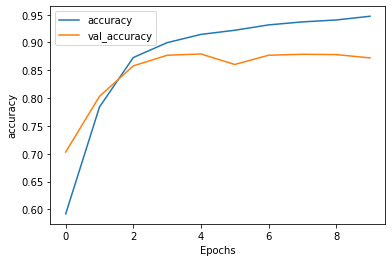

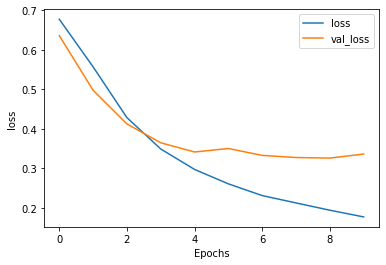

In [22]:
import matplotlib.pyplot as plt

#Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#Plot the accuracy and results 
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')